Build the general architecutre of a learning algorithm, including
* initializing parameters
* calcuulating the cost function and its gradient
* using an optimization algorithm (gradient descent)

In [2]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline

In [3]:
%pwd

'/content'

In [4]:
def load_dataset():
  train_dataset = h5py.File('/content/drive/MyDrive/Colab Notebooks/datasets/train_catvnoncat.h5', "r")
  train_set_x_orig = np.array(train_dataset["train_set_x"][:])
  train_set_y_orig = np.array(train_dataset["train_set_y"][:])

  test_dataset = h5py.File('/content/drive/MyDrive/Colab Notebooks/datasets/test_catvnoncat.h5', "r")
  test_set_x_orig = np.array(test_dataset["test_set_x"][:])
  test_set_y_orig = np.array(test_dataset["test_set_y"][:])

  classes = np.array(test_dataset["list_classes"][:])

  train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
  test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

  return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [5]:
train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes = load_dataset()

In [6]:
classes

array([b'non-cat', b'cat'], dtype='|S7')

y: [1]


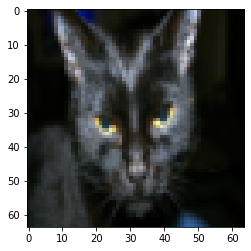

In [7]:
index = 25
plt.imshow(train_set_x_orig[index])
print("y: "+str(train_set_y_orig[:,index]))

In [8]:
train_set_y_orig

array([[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
        1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
        1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
        0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]])

In [9]:
print(train_set_x_orig.shape[0]), print(train_set_x_orig.shape[1]), print(test_set_x_orig.shape[0]), print(test_set_x_orig.shape[1])

209
64
50
64


(None, None, None, None)

In [10]:
print(train_set_x_orig.shape[2]), print(train_set_x_orig.shape[3])

64
3


(None, None)

In [11]:
print(train_set_x_orig.shape)

(209, 64, 64, 3)


In [12]:
print(train_set_x_orig[0][0].shape)

(64, 3)


In [13]:
train_set_x_orig[0].shape

(64, 64, 3)

In [14]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig[0].shape[0]

In [15]:
train_set_x_orig_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T

In [16]:
train_set_x_orig_flatten.shape

(12288, 209)

In [17]:
test_set_x_orig_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

In [18]:
test_set_x_orig_flatten.shape

(12288, 50)

In [19]:
train_set_x = train_set_x_orig_flatten/255
test_set_x = test_set_x_orig_flatten/255

* initialize the parameters of the model
* learn the parameters for the model by minimizing the cost
* use the learned parameters to make predictions (on the test set)
* analyze the results and conclude

In [20]:
def sigmoid(z):
  exp_z = np.exp(-z)
  return 1 / (1 + exp_z)

In [21]:
print("sigmoid([0, 2]): "+str(sigmoid(np.array([0, 2]))))

sigmoid([0, 2]): [0.5        0.88079708]


In [22]:
def initialize_with_zeros(dim):
  w = np.zeros((dim, 1))
  b = 0

  assert(w.shape == (dim,1))
  assert(isinstance(b, float) or isinstance(b, int))

  return w, b

In [23]:
dim = 2
w, b = initialize_with_zeros(dim)
print("w:"+str(w))
print("b:"+str(b))

w:[[0.]
 [0.]]
b:0


In [24]:
train_set_y_orig.shape

(1, 209)

In [25]:
def propagate(w, b, X, Y):
  z = np.dot(w.T, X) + b
  a = sigmoid(z)
  m = X.shape[1]
  loss = Y * np.log(a) + (1-Y) * np.log(1 - a)
  cost = -1/m * (np.sum(loss))

  db = 1/m * (np.sum(a-Y))
  dw = 1/m * (np.dot(X, ((a-Y).T)))
  assert(dw.shape == w.shape)
  assert(db.dtype == float)
  # print(cost.shape)
  cost = np.squeeze(cost)
  assert(cost.shape == ())

  grads = {"dw":dw,
           "db":db}

  return grads, cost

In [26]:
w, b, X, Y = np.array([[1.], [2.]]), 2., np.array([[1.,2.,-1.], [3.,4.,-3.2]]), np.array([[1,0,1]])
grads , cost = propagate(w,b,X,Y)

In [27]:
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


In [50]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
  costs = []
  for i in range(num_iterations):
    grades, cost = propagate(w,b, X, Y)

    dw = grades["dw"]
    db = grades["db"]

    w = w - (learning_rate * dw)
    b = b - (learning_rate * db)

    if i%100 == 0:
      costs.append(cost)
    
    if print_cost and i%100 == 0:
      print(f"cost after iterations {i}:"+str(cost))
    
  params = {"w":w,
            "b":b}

  grades = {"dw":dw,
            "db":db}
  return grades, params, costs

In [51]:
grads, params, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = True)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print("cost after 100 iterations:"+str(costs))

cost after iterations 0:0.8077356337712416
w = [[-0.08608643]
 [ 0.10971233]]
b = -0.1442742664803268
dw = [[0.12311093]
 [0.13629247]]
db = -0.14923915884638042
cost after 100 iterations:[0.8077356337712416]


Predict Function

In [52]:
print(np.array((3,1)))

[3 1]


In [53]:
def predict(w, b, X):
  m = X.shape[1]
  w = w.reshape(X.shape[0], 1)
  y_prediction = np.zeros((1, m))

  z = np.dot(w.T, X) + b
  a = sigmoid(z)
  
  for i in range(a.shape[1]):
    y_prediction[0][i] = 1 if a[0][i] > 0.5 else 0
  assert(y_prediction.shape == (1,m))

  return y_prediction

In [54]:
w = np.array([[0.1124579], [0.23106775]])
print(w.shape)
b = -0.3
X = np.array([[1.,-1.1, -3.2], [1.2, 2., 0.1]])
print("prediction ="+str(predict(w,b, X)))

(2, 1)
prediction =[[1. 1. 0.]]


Merge all functions into a model

In [55]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
  w, b = initialize_with_zeros(X_train.shape[0])    
  grads, parameters, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, True)

  w = parameters["w"]
  b = parameters["b"]

  y_prediction_test = predict(w, b, X_test)
  y_prediction_train = predict(w,b, X_train)

  print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - Y_train)) * 100))
  print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - Y_test)) * 100))

  d = {"costs": costs,
        "Y_prediction_test": y_prediction_test, 
        "Y_prediction_train" : y_prediction_train, 
        "w" : w, 
        "b" : b,
        "learning_rate" : learning_rate,
        "num_iterations": num_iterations}
  return d

In [56]:
d = model(train_set_x, train_set_y_orig, test_set_x, test_set_y_orig, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

cost after iterations 0:0.6931471805599453
cost after iterations 100:0.5845083636993086
cost after iterations 200:0.46694904094655476
cost after iterations 300:0.37600686694802077
cost after iterations 400:0.3314632893282512
cost after iterations 500:0.30327306747438293
cost after iterations 600:0.27987958658260487
cost after iterations 700:0.26004213692587574
cost after iterations 800:0.2429406846779662
cost after iterations 900:0.22800422256726063
cost after iterations 1000:0.21481951378449635
cost after iterations 1100:0.20307819060644985
cost after iterations 1200:0.19254427716706862
cost after iterations 1300:0.18303333796883503
cost after iterations 1400:0.17439859438448874
cost after iterations 1500:0.16652139705400335
cost after iterations 1600:0.15930451829756614
cost after iterations 1700:0.15266732471296504
cost after iterations 1800:0.1465422350398234
cost after iterations 1900:0.1408720757031016
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


In [57]:
d

{'Y_prediction_test': array([[1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1.,
         0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1.,
         1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1.,
         1., 0.]]),
 'Y_prediction_train': array([[0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
         0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0.,
         0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
         0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0.,
         0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0.,
         0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
         0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
         1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0.,
         1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 

IndexError: ignored

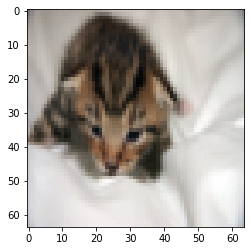

In [58]:
index = 1
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))
print ("y = " + str(test_set_y_orig[0,index]) + ", you predicted that it is a \"" + classes[d["Y_prediction_test"][0,index]].decode("utf-8") +  "\" picture.")

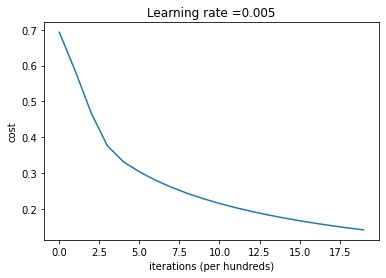

In [59]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()